In [2]:
import pandas as pd # type: ignore
# 显示所有列
pd.set_option('display.max_columns', None)
# # 显示所有行
pd.set_option('display.max_rows', None) 

In [3]:


# 添加一个标准化处理过程
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df1 = pd.read_csv('..\Data\data1.csv')
scaler.fit(df1)
print(df1)

     X1  X2  X3   X4  X5  X6  X7  X8  X9  X10  X11  X12  X13  X14  X15  X16  \
0     1   6   4   12   5   5   3   4   1   67    3    2    1    2    1    0   
1     2  48   2   60   1   3   2   2   1   22    3    1    1    1    1    0   
2     4  12   4   21   1   4   3   3   1   49    3    1    2    1    1    0   
3     1  42   2   79   1   4   3   4   2   45    3    1    2    1    1    0   
4     1  24   3   49   1   3   3   4   4   53    3    2    2    1    1    1   
5     4  36   2   91   5   3   3   4   4   35    3    1    2    2    1    0   
6     4  24   2   28   3   5   3   4   2   53    3    1    1    1    1    0   
7     2  36   2   69   1   3   3   2   3   35    3    1    1    2    1    0   
8     4  12   2   31   4   4   1   4   1   61    3    1    1    1    1    0   
9     2  30   4   52   1   1   4   2   3   28    3    2    1    1    1    1   
10    2  12   2   13   1   2   2   1   3   25    3    1    1    1    1    1   
11    1  48   2   43   1   2   2   4   2   24    3  

In [3]:
import seaborn as sns # type: ignore
import matplotlib.pyplot as plt # type: ignore
from sklearn.decomposition import PCA # type: ignore
from sklearn.preprocessing import StandardScaler # type: ignore
import matplotlib.pyplot as plt # type: ignore

### 先通过计算两个常用相关系数观察出一个大致的规律

In [4]:
# 计算Spearman和Pearson相关系数
spearman_corr = df1.corr(method='spearman')
pearson_corr = df1.corr()

# 显示Spearman相关系数
print("\nSpearman Correlation:")
print(spearman_corr)

# 显示Pearson相关系数
print("\nPearson Correlation:")
print(pearson_corr)

# 假设你的相关系数矩阵存储在变量 corr 中
spearman_corr.to_csv('../Data/Q1_spearman_correlation_matrix.csv')
pearson_corr.to_csv('../Data/Q1_pearson_correlation_matrix.csv')



Spearman Correlation:
                                   X1        X2        X3        X4        X5  \
X1                           1.000000 -0.062703  0.190632 -0.016533  0.242742   
X2                          -0.062703  1.000000 -0.041502  0.624978  0.051335   
X3                           0.190632 -0.041502  1.000000 -0.011098  0.014782   
X4                          -0.016533  0.624978 -0.011098  1.000000  0.050229   
X5                           0.242742  0.051335  0.014782  0.050229  1.000000   
X6                           0.099142  0.057358  0.147885  0.000268  0.123191   
X7                           0.043597  0.018118  0.055931  0.000251  0.021395   
X8                          -0.048577  0.043671  0.059558  0.023757  0.093089   
X9                          -0.027092  0.306794 -0.047723  0.310856  0.033086   
X10                          0.087560 -0.036316  0.168350  0.026591  0.085453   
X11                          0.042900 -0.079400  0.125197 -0.032195  0.003908   
X12  

In [5]:
# 将Spearman相关系数矩阵转换为DataFrame（如果还不是的话）
spearman_corr_df = pd.DataFrame(spearman_corr)

# 对Spearman相关系数进行排序（从大到小）
sorted_spearman_corr = spearman_corr_df.stack().sort_values(ascending=False)

# 打印排序后的Spearman相关系数
print("\nSorted Spearman Correlation (from highest to lowest):")
print(sorted_spearman_corr)

# 将Pearson相关系数矩阵转换为DataFrame（如果还不是的话）
pearson_corr_df = pd.DataFrame(pearson_corr)

# 对Pearson相关系数进行排序（从大到小）
sorted_pearson_corr = pearson_corr_df.stack().sort_values(ascending=False)

# 打印排序后的Pearson相关系数
print("\nSorted Pearson Correlation (from highest to lowest):")
print(sorted_pearson_corr)

# sorted_pearson_corr.to_csv('../Data/Q1_sorted_pearson_correlation.csv')
# sorted_spearman_corr.to_csv('../Data/Q1_sorted_spearman_correlation.csv')


Sorted Spearman Correlation (from highest to lowest):
X1                           X1                             1.000000
X14                          X14                            1.000000
X4                           X4                             1.000000
X5                           X5                             1.000000
X6                           X6                             1.000000
X7                           X7                             1.000000
X8                           X8                             1.000000
X9                           X9                             1.000000
X10                          X10                            1.000000
X11                          X11                            1.000000
X12                          X12                            1.000000
X15                          X15                            1.000000
X2                           X2                             1.000000
X16                          X16                

In [6]:
# 去除重复的Spearman相关系数
sorted_spearman_corr_unique = sorted_spearman_corr.drop_duplicates()

# 打印唯一的Spearman相关系数
print("\nUnique Sorted Spearman Correlation (from highest to lowest):")
print(sorted_spearman_corr_unique)

# 同样地，对Pearson相关系数做相同的处理
sorted_pearson_corr_unique = sorted_pearson_corr.drop_duplicates()

# 打印唯一的Pearson相关系数
print("\nUnique Sorted Pearson Correlation (from highest to lowest):")
print(sorted_pearson_corr_unique)

sorted_pearson_corr_unique.to_csv('../Data/Q1_unique_sorted_pearson_correlation.csv')
sorted_spearman_corr_unique.to_csv('../Data/Q1_unique_sorted_spearman_correlation.csv')


Unique Sorted Spearman Correlation (from highest to lowest):
X1                           X1                             1.000000
X4                           X2                             0.624978
X12                          X3                             0.506025
X6                           X10                            0.312243
X4                           X9                             0.310856
X9                           X2                             0.306794
X4                           X17                            0.286044
X6                           X8                             0.256016
X14                          X4                             0.255404
X5                           X1                             0.242742
X10                          X8                             0.234709
X2                           Y(1=default, 0=non-default)    0.205685
X9                           X14                            0.196154
X10                          X13         

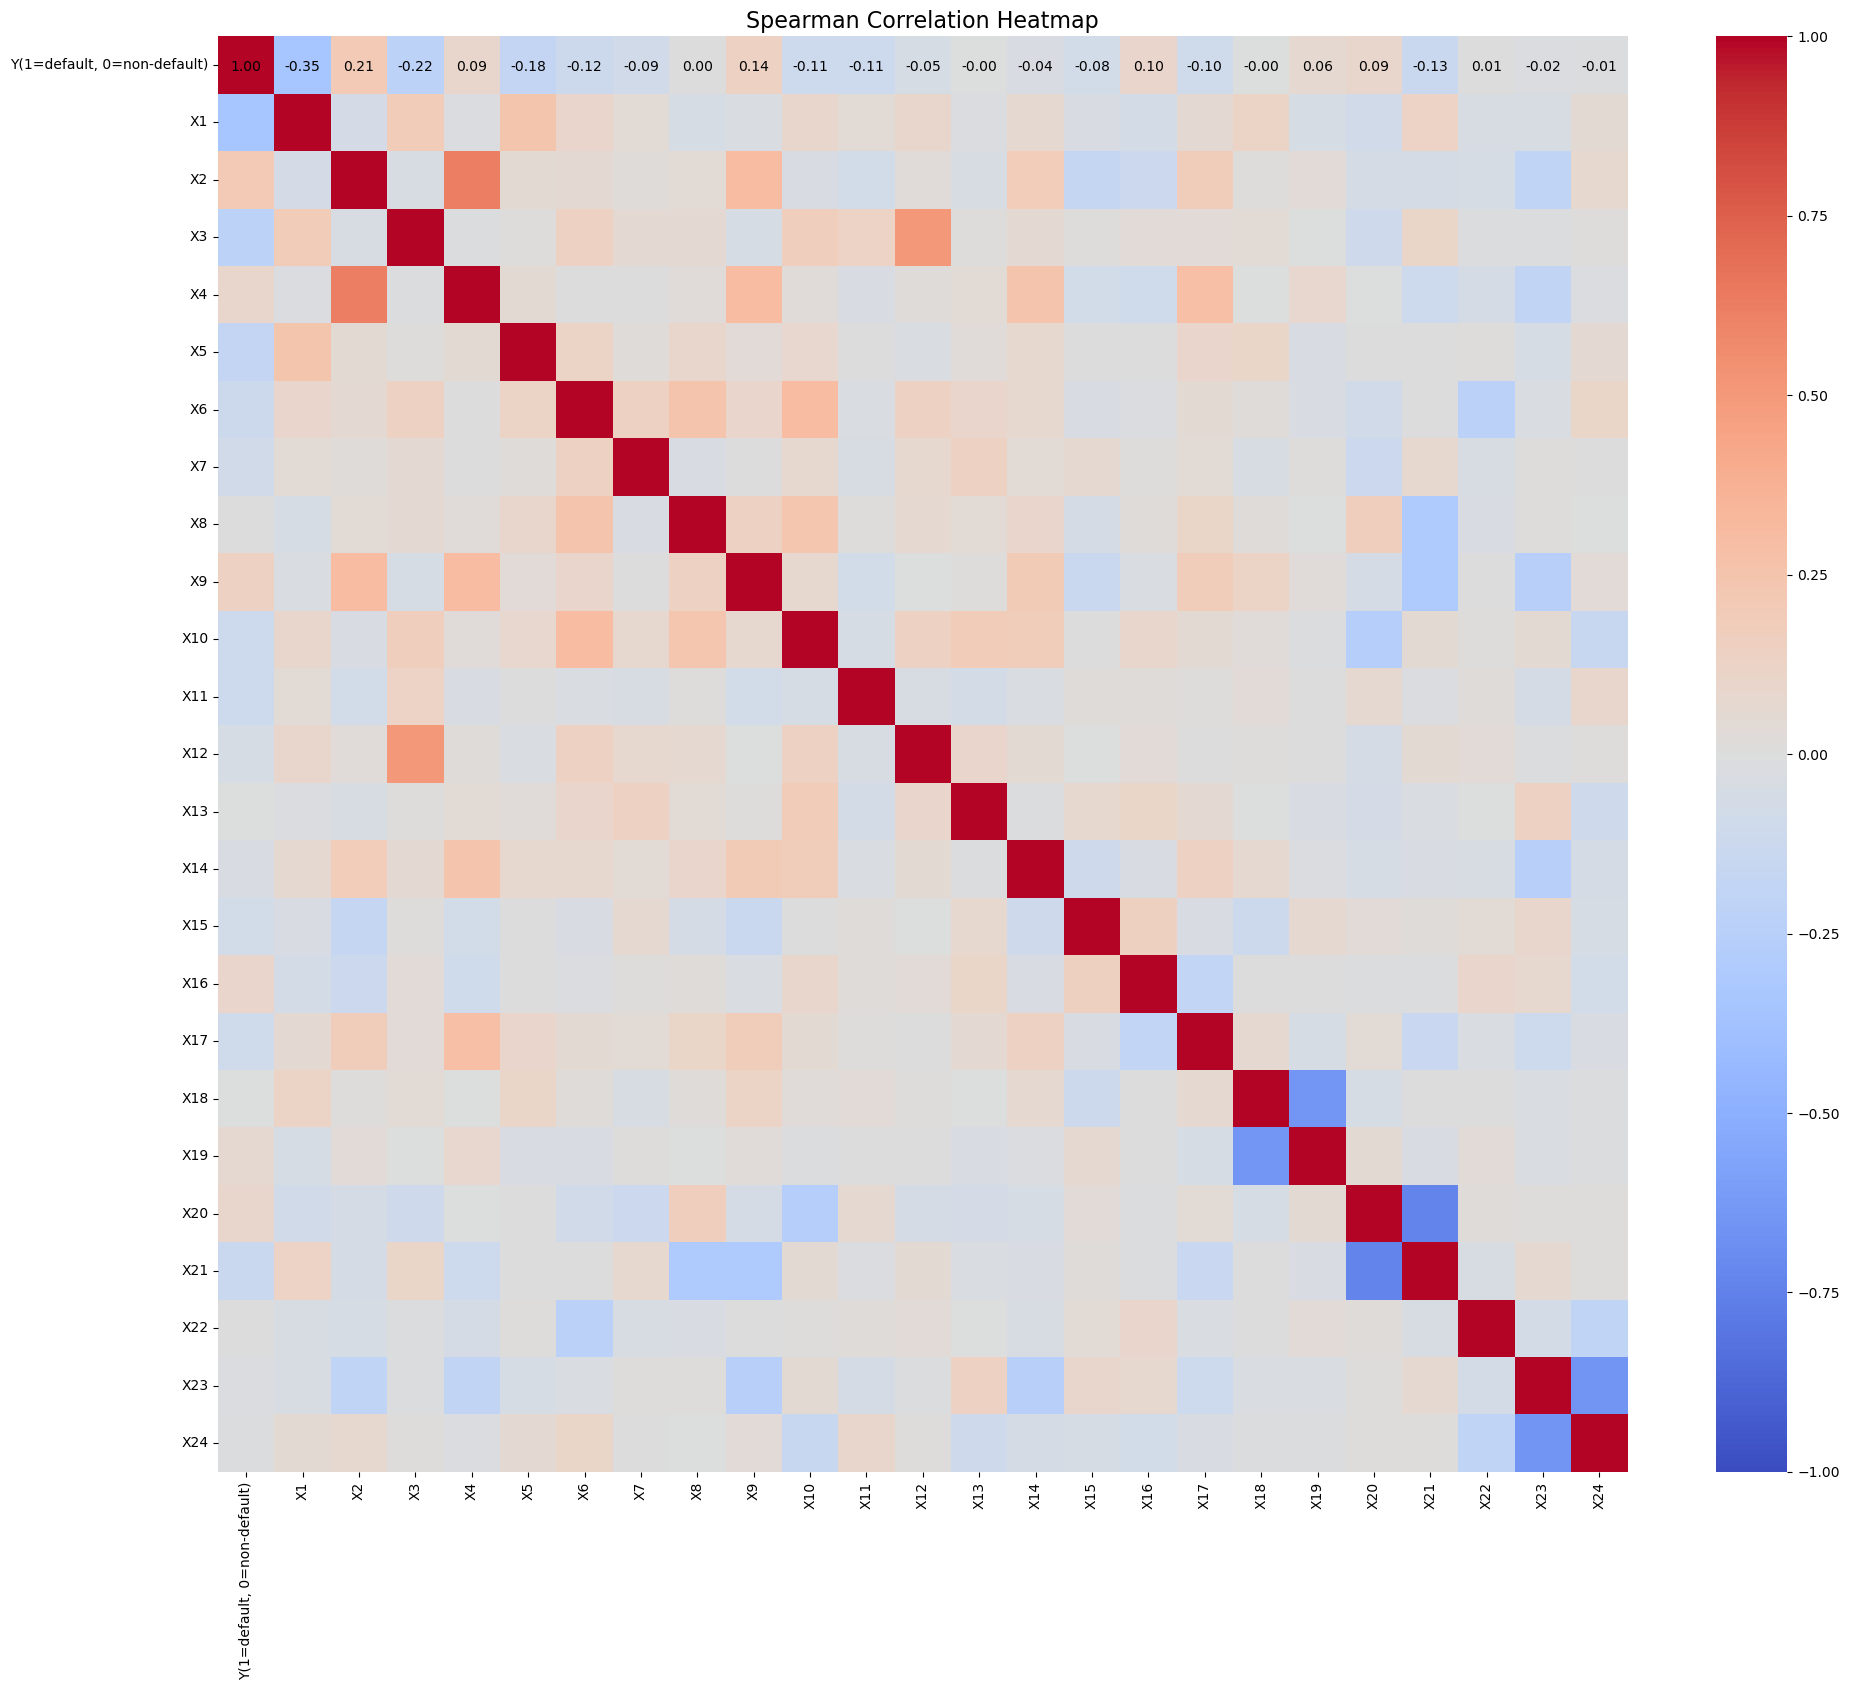

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# 获取列名和索引名
columns = spearman_corr.columns.tolist()
index = spearman_corr.index.tolist()

# 将最后一列名移到第一位
columns = [columns[-1]] + columns[:-1]

# 将最后一行索引名移到第一位
index = [index[-1]] + index[:-1]

# 重新排序列和行
corr_reordered = spearman_corr.loc[index, columns]

# 创建图形
plt.figure(figsize=(20, 17))

# 使用 seaborn 绘制热图
sns.heatmap(corr_reordered, annot=False, cmap='coolwarm', vmin=-1, vmax=1)

last_row = spearman_corr.iloc[-1]
modified_last_row = pd.Series(
    [last_row.iloc[-1]] + last_row.iloc[:-1].tolist(), 
    index=last_row.index
)

# 在第一行上方添加相关系数文本

for i, val in enumerate(modified_last_row):
    plt.text(i + 0.5, 0.65, f'{val:.2f}', ha='center', va='bottom')

# 设置标题和标签
plt.title('Spearman Correlation Heatmap', fontsize=16)
# plt.xlabel('Features', fontsize=12)
# plt.ylabel('Features', fontsize=12)

plt.savefig('../Data/Q1_Spearman_Correlation_Heatmap.png')

# 调整布局并显示
plt.tight_layout()
plt.show()

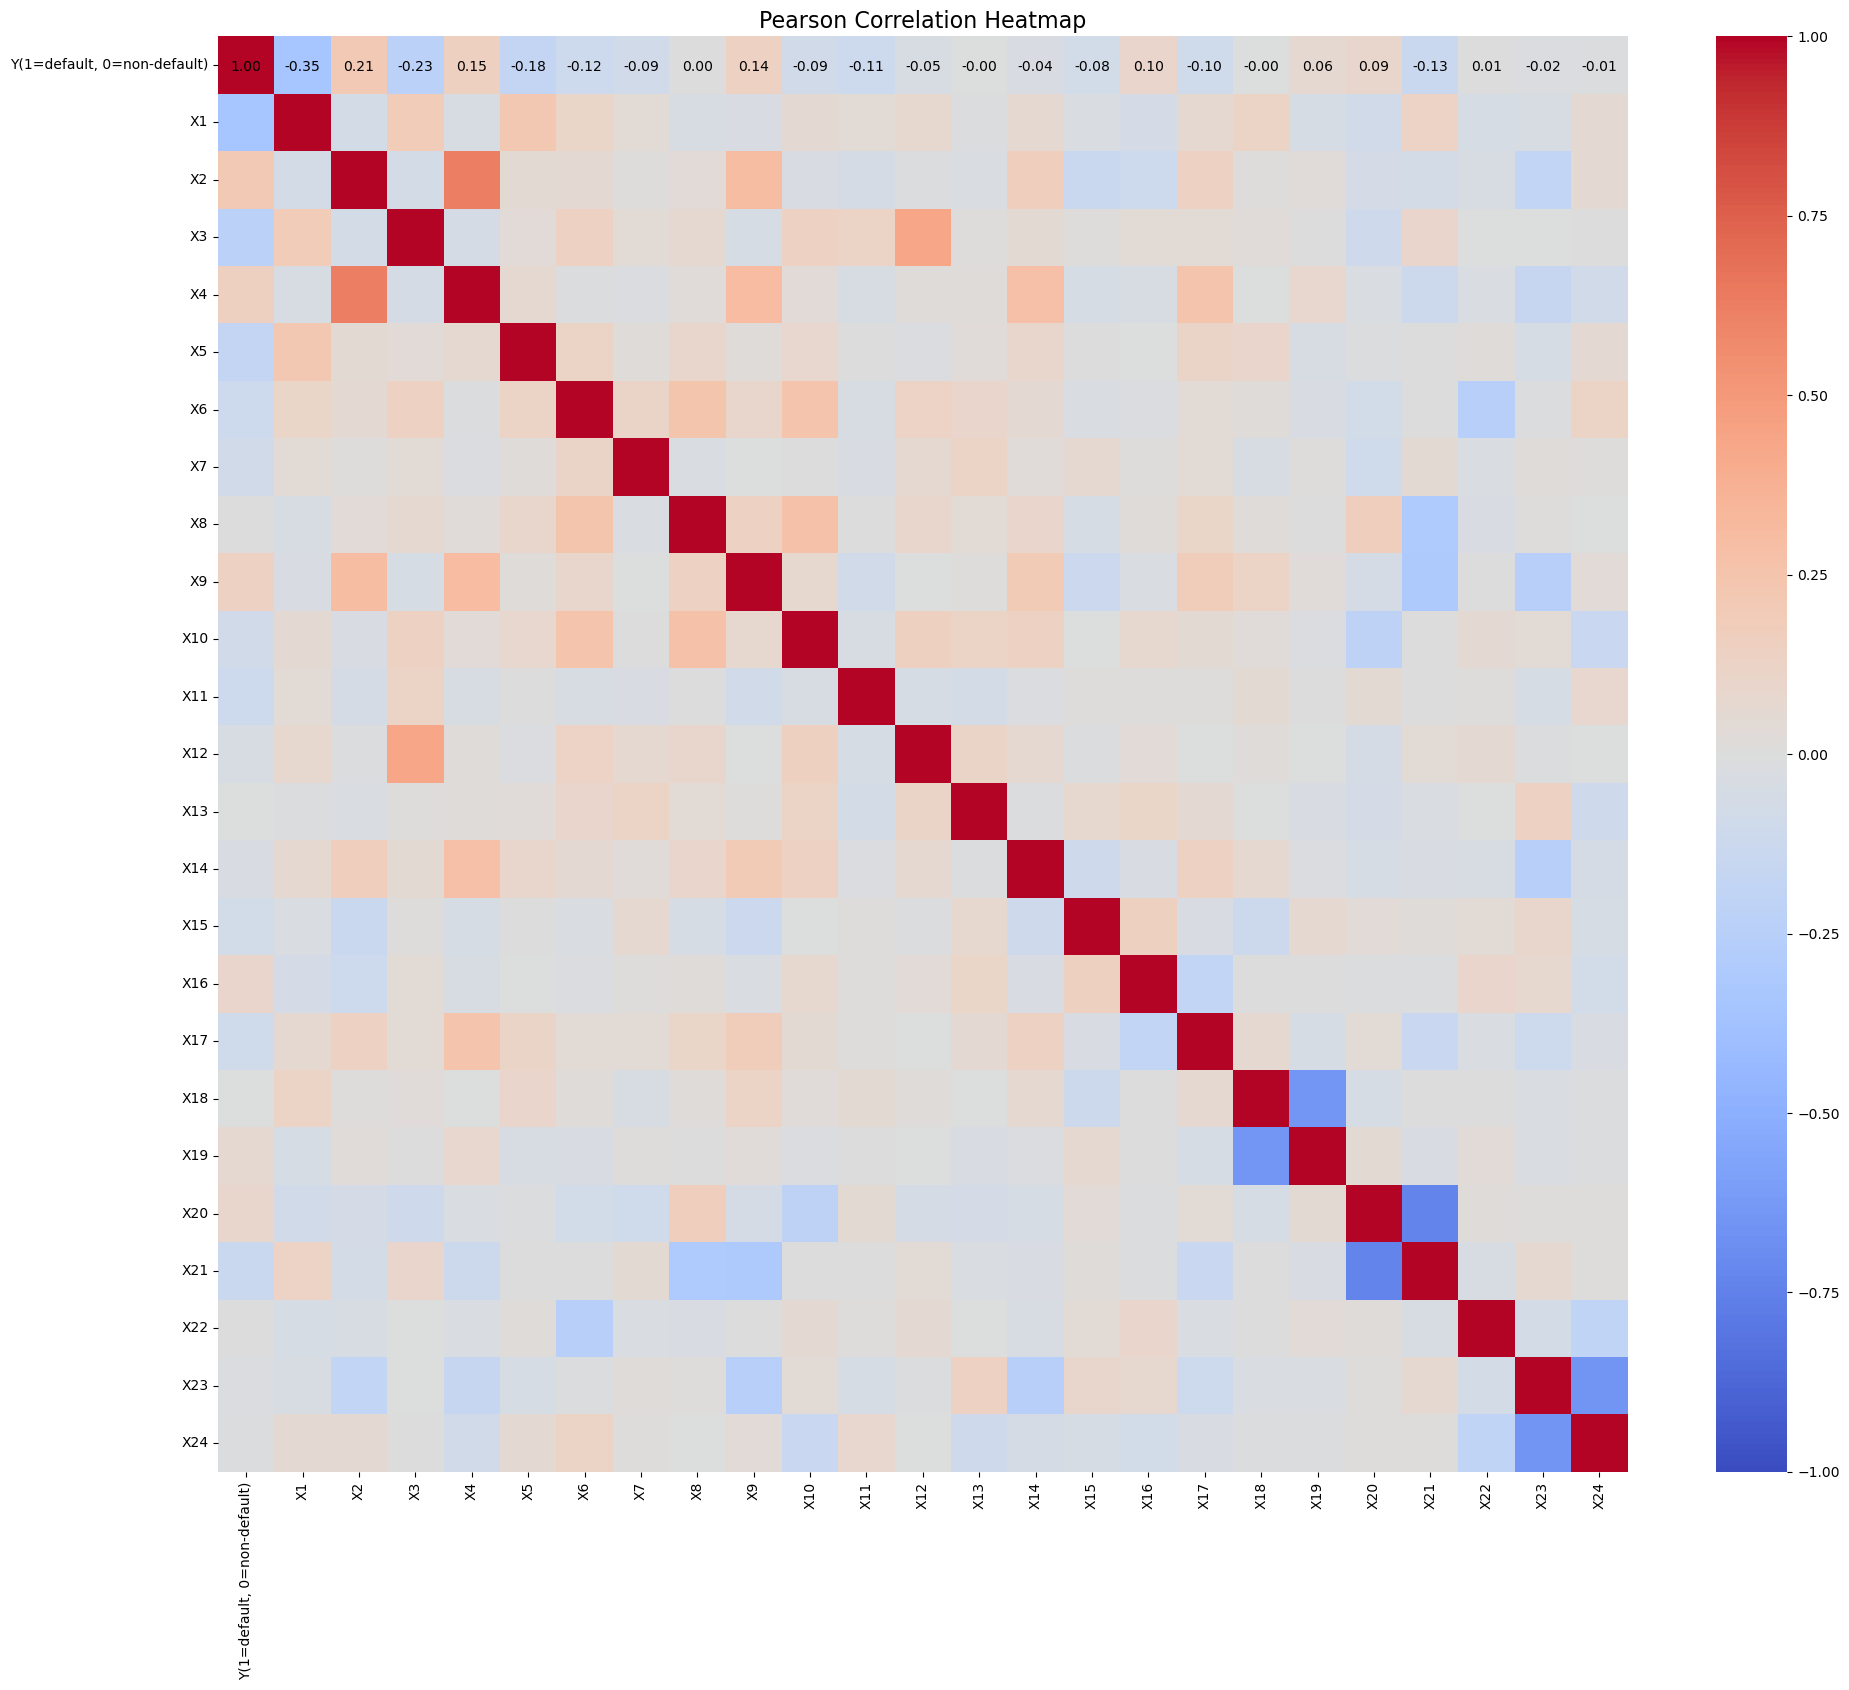

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# 获取列名和索引名
columns = pearson_corr.columns.tolist()
index = pearson_corr.index.tolist()

# 将最后一列名移到第一位
columns = [columns[-1]] + columns[:-1]

# 将最后一行索引名移到第一位
index = [index[-1]] + index[:-1]

# 重新排序列和行
corr_reordered = pearson_corr.loc[index, columns]

# 创建图形
plt.figure(figsize=(20, 17))

# 使用 seaborn 绘制热图
sns.heatmap(corr_reordered, annot=False, cmap='coolwarm', vmin=-1, vmax=1)

last_row = pearson_corr.iloc[-1]
modified_last_row = pd.Series(
    [last_row.iloc[-1]] + last_row.iloc[:-1].tolist(), 
    index=last_row.index
)

# 在第一行上方添加相关系数文本

for i, val in enumerate(modified_last_row):
    plt.text(i + 0.5, 0.65, f'{val:.2f}', ha='center', va='bottom')

# 设置标题和标签
plt.title('Pearson Correlation Heatmap', fontsize=16)
# plt.xlabel('Features', fontsize=12)
# plt.ylabel('Features', fontsize=12)

plt.savefig('../Data/Q1_Pearson_Correlation_Heatmap.png')

# 调整布局并显示
plt.tight_layout()
plt.show()

### 暂时忽略：再通过具体的PCA方法进一步进行细致的指标筛选（与Q1_PCA_Lasso.ipynb）中的部分内容重合

In [9]:
from sklearn.decomposition import PCA # type: ignore
from sklearn.preprocessing import StandardScaler # type: ignore

# 假设df1是已经加载的DataFrame
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df1)

# 设置PCA的主成分数量（例如，设置为数据的特征数量或更少的数量）
n_components = min(scaled_data.shape[1], 10)  # 例如，最多10个主成分
pca = PCA(n_components=n_components)
pca_data = pca.fit_transform(scaled_data)

# 获取每个主成分的贡献度（解释的方差比例）
explained_variance_ratio = pca.explained_variance_ratio_

# 打印贡献度及排序
print("\nPCA Explained Variance Ratio (from highest to lowest):")
for i, var in enumerate(explained_variance_ratio):
    print(f"PC {i+1}: {var:.2%}")

# 如果你想以排序的方式查看贡献度
# sorted_indices = explained_variance_ratio.argsort()[::-1]
# for i in sorted_indices:
#     print(f"PC {i+1}: {explained_variance_ratio[i]:.2%}")


PCA Explained Variance Ratio (from highest to lowest):
PC 1: 10.19%
PC 2: 9.11%
PC 3: 7.42%
PC 4: 6.95%
PC 5: 6.62%
PC 6: 5.43%
PC 7: 5.28%
PC 8: 4.67%
PC 9: 4.49%
PC 10: 4.05%


In [10]:
from sklearn.decomposition import PCA # type: ignore
from sklearn.preprocessing import StandardScaler # type: ignore

# 假设df1是已经加载的DataFrame
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df1)

# 设置PCA的主成分数量（例如，设置为数据的特征数量或更少的数量）
n_components = min(scaled_data.shape[1], 10)  # 例如，最多10个主成分
pca = PCA(n_components=n_components)
pca.fit(scaled_data)

# 获取每个主成分的载荷
component_loadings = pca.components_

# 打印载荷和对应的原始特征
for i, component in enumerate(component_loadings):
    print(f"PC {i+1} Loadings:")
    for j, loading in enumerate(component):
        print(f"  Feature {df1.columns[j]}: {loading:.2f}")
    print()

# 如果你还想看到按贡献度排序的主成分索引
sorted_indices = explained_variance_ratio.argsort()[::-1]

# 打印按贡献度排序的主成分载荷（可选）
for i in sorted_indices:
    print(f"PC {i+1} Loadings (sorted by explained variance):")
    for j, loading in enumerate(component_loadings[i]):
        print(f"  Feature {df1.columns[j]}: {loading:.2f}")
    print()

PC 1 Loadings:
  Feature X1: -0.06
  Feature X2: 0.42
  Feature X3: -0.09
  Feature X4: 0.42
  Feature X5: 0.07
  Feature X6: 0.08
  Feature X7: -0.03
  Feature X8: 0.18
  Feature X9: 0.40
  Feature X10: 0.03
  Feature X11: -0.05
  Feature X12: -0.02
  Feature X13: -0.03
  Feature X14: 0.27
  Feature X15: -0.17
  Feature X16: -0.11
  Feature X17: 0.25
  Feature X18: 0.06
  Feature X19: 0.01
  Feature X20: 0.13
  Feature X21: -0.29
  Feature X22: -0.04
  Feature X23: -0.30
  Feature X24: 0.13
  Feature Y(1=default, 0=non-default): 0.17

PC 2 Loadings:
  Feature X1: -0.34
  Feature X2: -0.00
  Feature X3: -0.34
  Feature X4: -0.01
  Feature X5: -0.23
  Feature X6: -0.31
  Feature X7: -0.13
  Feature X8: -0.09
  Feature X9: -0.03
  Feature X10: -0.29
  Feature X11: -0.03
  Feature X12: -0.26
  Feature X13: -0.09
  Feature X14: -0.19
  Feature X15: 0.06
  Feature X16: 0.05
  Feature X17: -0.13
  Feature X18: -0.20
  Feature X19: 0.18
  Feature X20: 0.33
  Feature X21: -0.25
  Feature X22: 

In [11]:
# PCA可视化？